# **Day 2 - Python Data Exploration**

## **Setup**

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# url to dataset on github

url = 'https://raw.githubusercontent.com/webeet-io/_onboarding_data/refs/heads/sebastian-nichtweiss/daily_tasks/day_2/day_2_datasets/high-school-directory.csv?token=GHSAT0AAAAAADISP6UPXDNVZ7QM3GKZFAIK2ESCVQQ'

## **Task 2**

Load the data with pandas and clean column names by replacing whitespaces with _ , removing special characters and making them lower.

### Load data

In [143]:
# load in csv from github to dataframe

nyc_schools = pd.read_csv(url)

In [141]:
# take a look

nyc_schools

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,02M300,Urban Assembly School of Design and Constructi...,Manhattan,M535,212-586-0981,212-586-1731,9.0,12,NaN,NaN,...,3.0,135.0,1083802.0,1.010790e+09,Clinton ...,12081.0,12,4,10,10
431,09X412,Bronx High School of Business,Bronx,X410,718-410-4060,718-992-5760,9.0,12,NaN,NaN,...,16.0,225.0,2007806.0,2.028170e+09,East Concourse-Concourse Village ...,10935.0,50,5,42,27
432,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,18181.0,42,2,37,53
433,02M407,Institute for Collaborative Education,Manhattan,M475,212-475-7972,212-475-0459,6.0,12,NaN,NaN,...,2.0,48.0,1020419.0,1.009220e+09,Gramercy ...,11724.0,71,4,50,7


### Clean column names

In [7]:
# check column names

nyc_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

**Create function to clean column names.**
The objectives are to make the names lower case, replace whitespaces with underscores and to remove special characters.

In [36]:
def clean_columns(x):

  x = x.replace(' ', '_') # replacing whitespaces with underscores

  x = x.lower() # making the strings lower

  x = re.sub('[^\w]', '', x) # removing special characters

  return x

In [33]:
# map the function to the column names

nyc_schools = nyc_schools.rename(clean_columns, axis='columns')

In [35]:
nyc_schools.columns # ...worked!

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

## **Task 3**

Filter the dataset to include only schools located in Brooklyn

In [37]:
# checking the values of the borough column

nyc_schools['borough'].unique()

array(['Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'],
      dtype=object)

In [38]:
# filtering the 'borough' column for brooklyn

nyc_schools_filtered = nyc_schools[nyc_schools['borough'] == 'Brooklyn']

In [41]:
nyc_schools_filtered.head(3)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49


## **Task 4**

Answer two questions about the data

### Q1

How many schools are in Brooklyn?

In [43]:
#use dbn column to count distinct schools in brooklyn
nyc_schools_filtered['dbn'].nunique()

121

121 schools are located in Brooklyn.

### Q2

How many schools offer 9 grade entry?

In [50]:
# count the schools that offer a minimum grade span of 9

nyc_schools_filtered[['dbn', 'grade_span_min']].groupby('dbn').max()['grade_span_min'].value_counts()

,count
grade_span_min,
9.0,98
6.0,23


98 schools offer grade 9 entry.

## **Task 5**

Group and summarize (based on the whole table, not the filtered one)

### Count of schools per borough

In [79]:
# group per borough and aggregate 'dbn'

schools_per_borough = (nyc_schools[['borough', 'dbn']].groupby('borough').nunique() # aggregating df
.rename({'dbn':'count of schools'},axis='columns')) # renaming column

schools_per_borough

,count of schools
borough,
Bronx,118
Brooklyn,121
Manhattan,106
Queens,80
Staten Island,10


### Average number of students per borough

In [120]:
# subset for borough and total students, group by borough and avg total students

nyc_schools[['borough', 'total_students']].groupby('borough').mean().round(2)

,total_students
borough,
Bronx,490.41
Brooklyn,699.13
Manhattan,589.83
Queens,1046.64
Staten Island,1847.50


### Grade_span_max per borough

In [84]:
# aggregate grade_span_max by multiple measures to summarize per borough

stat_measures = ['sum', 'mean', 'median', 'min', 'max', 'std']

nyc_schools[['borough', 'grade_span_max']].groupby('borough').agg(
    {'grade_span_max': stat_measures}
)

grade_span_max                                    
                         sum       mean median min max       std
borough                                                         
Bronx                   1405  11.906780   12.0   9  12  0.369506
Brooklyn                1444  11.933884   12.0   9  12  0.381566
Manhattan               1259  11.877358   12.0   9  12  0.472135
Queens                   946  11.825000   12.0  10  12  0.497462
Staten Island            120  12.000000   12.0  12  12  0.000000

## **Task 6**

Create a bar chart of number of schools per borough

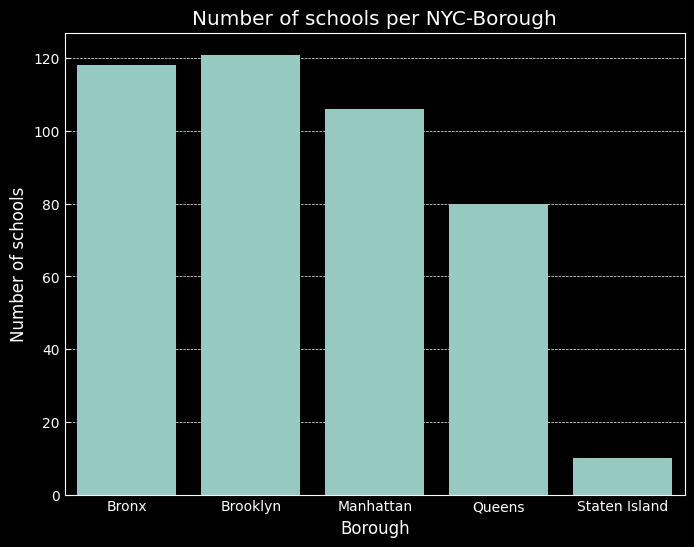

In [78]:
plt.figure(figsize=(8,6))
sns.barplot(schools_per_borough, x='borough', y='count of schools')
plt.title('Number of schools per NYC-Borough')
plt.xlabel('Borough')
plt.ylabel('Number of schools')
plt.style.use('dark_background')
plt.show()

## **Additional Analysis**

**Of the 30 biggest schools, how many are in which borough?**

In [144]:
# filtering for the 30 schools with most students and looking into their distribution over the boroughs

nyc_biggest_schools = nyc_schools[['dbn','borough', 'total_students']].sort_values('total_students', ascending=False).head(30)

nyc_biggest_schools['borough'].value_counts()

,count
borough,
Queens,14
Brooklyn,8
Staten Island,4
Manhattan,2
Bronx,2


**Which borough hosts what amount of total students in NYC?**

In [145]:
# creating a df with number of students per borough

students_per_borough = nyc_schools[['borough', 'total_students']].groupby('borough').sum().round(2)

In [127]:
# creating additional column for the percentages

students_per_borough['percentage'] = (students_per_borough['total_students']
                                      / students_per_borough['total_students'].sum() *100).round(2)

In [128]:
students_per_borough

,total_students,percentage
borough,,
Bronx,57868.0,19.30
Brooklyn,83197.0,27.75
Manhattan,60752.0,20.26
Queens,79545.0,26.53
Staten Island,18475.0,6.16


**Is there a notable difference in terms of non-public school students in any boroughs?**

In [152]:
# creating a subset

nyc_schools_public = nyc_schools[['dbn','borough', 'psal_sports_boys', 'total_students']]

In [155]:
# creating a column that distinguishes between public and non-public schools based on the schools PSAL attendence

nyc_schools_public['private_or_not'] = nyc_schools_public['psal_sports_boys'].isna()

/tmp/ipython-input-1875376523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_schools_public['private_or_not'] = nyc_schools_public['psal_sports_boys'].isna()


In [157]:
# looking into the number of students per borough per school_type

(nyc_schools_public[['borough','total_students', 'private_or_not']]
    .groupby(['borough', 'private_or_not']).sum())

total_students
borough       private_or_not                
Bronx         False                  49259.0
              True                    8609.0
Brooklyn      False                  77050.0
              True                    6147.0
Manhattan     False                  54640.0
              True                    6112.0
Queens        False                  76436.0
              True                    3109.0
Staten Island False                  18475.0

## **Task 7 - Insights**

*   The borough Queens hosts the 2nd highest amount of students while only having the 2nd lowest number of schools. Logical since Queens hosts half of NYC's biggest schools.
*   The Bronx is often considered to be a poor borough. However there is no notable difference compared to other boroughs when looking into the amount of high school students or number of non-public schools.
